# Changeover and Availability
This notebook looks at the % of available time that is being taken over by changeovers

In [29]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import set_config

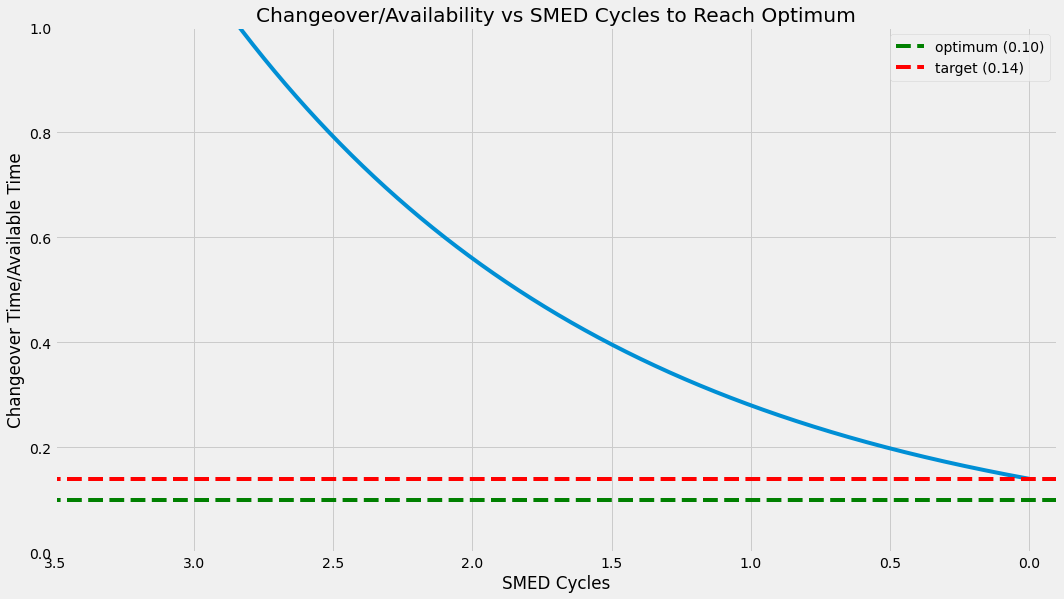

In [3]:
cycles = np.linspace(0,11,100000)
def smed(x):
    """
    Changeover/Availability vs SMED Cycles
    :param x: SMED Cycles
    :return: Changeover/Availability
    """
    y = 0.14*2**(x)
    return y

def inverse_smed(y):
    x = np.log2(y/0.1)
    return x

plt.figure(figsize=(16,9))
plt.plot(cycles, smed(cycles))
plt.axis([3.5, -0.1, 0, 1])
plt.hlines(0.1, -0.1, 4, label = "optimum (0.10)", linestyles='--', colors='green')
plt.hlines(0.14, -0.1, 4, label='target (0.14)', linestyles='--', colors='red')
plt.xlabel('SMED Cycles')
plt.ylabel('Changeover Time/Available Time')
plt.title('Changeover/Availability vs SMED Cycles to Reach Optimum')
plt.legend()
plt.show()

In [4]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))
print ("dir_race is %s" % (dir_race))

filename = 'oee_extracts_all_sites2.xlsx'
path = os.path.join(dir_local, filename)
df = pd.read_excel(path, na_values=('-'))

dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/
dir_race is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data


In [7]:
df.dropna(subset={'Week'}, inplace=True)
df['WeekOfYear'] = pd.to_numeric(df['Week'].str[1:3])
df['Year'] = pd.to_numeric(df['Week'].str[4:])
dates = df.Year*100+df.WeekOfYear
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df.head()

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,Quality %,Net Time,Net Opening Time,Scheduled Down Time,Useful Time,Operating Time,Duration (min),WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,0.519638,0.070090,0.212359,0.711021,0.730834,1.000000,17:40:03.733000,34.000000,134.000000,17:40:03.733000,1900-01-01 00:10:29,589.516667,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,0.359199,0.062479,0.470711,0.474172,0.762421,0.993583,13:17:08.958000,36.750000,131.250000,13:12:02.028000,17:25:33,1159.450000,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,0.031299,0.000000,0.000000,1.000000,0.031299,1.000000,00:22:32.113000,12.000000,156.000000,00:22:32.113000,12:00:00,0.000000,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,0.390467,0.139973,0.296680,0.601649,0.649678,0.998948,04:48:28.071000,12.300000,155.700000,04:48:09.857000,07:24:01,293.983333,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,0.158301,0.089099,0.137793,0.706554,0.224047,1.000000,01:57:08.571000,12.333333,155.666667,01:57:08.571000,08:42:51,217.150000,1,2020,2020-01-12


In [9]:
df.rename(columns={'Duration (min)': 'ChangeOverTime'}, inplace=True)

In [10]:
df = df[df.ChangeOverTime > 0]
df.head()


,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,Quality %,Net Time,Net Opening Time,Scheduled Down Time,Useful Time,Operating Time,ChangeOverTime,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,0.519638,0.070090,0.212359,0.711021,0.730834,1.000000,17:40:03.733000,34.000000,134.000000,17:40:03.733000,1900-01-01 00:10:29,589.516667,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,0.359199,0.062479,0.470711,0.474172,0.762421,0.993583,13:17:08.958000,36.750000,131.250000,13:12:02.028000,17:25:33,1159.450000,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,0.390467,0.139973,0.296680,0.601649,0.649678,0.998948,04:48:28.071000,12.300000,155.700000,04:48:09.857000,07:24:01,293.983333,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,0.158301,0.089099,0.137793,0.706554,0.224047,1.000000,01:57:08.571000,12.333333,155.666667,01:57:08.571000,08:42:51,217.150000,1,2020,2020-01-12
29,W01-2020,LSX - IWK Packaging Line,0.329120,0.184123,0.223168,0.367645,0.926602,0.966123,12:34:33.750000,36.916667,131.083333,12:09:00,13:34:20,1400.666667,1,2020,2020-01-12


In [37]:
pd.to_datetime(df['Net Time'].astype(str), format='%H:%M:%S.%f')


ValueError: time data '1900-01-03 17:19:29.929000' does not match format '%H:%M:%S.%f' (match)

In [19]:
df.set_index('Date', inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6606 entries, 2020-01-12 to 2021-01-10
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Week                 6606 non-null   object 
 1   Line                 6606 non-null   object 
 2   OEE %                6606 non-null   float64
 3   Changeover           6606 non-null   float64
 4   Unplanned_tech_loss  6606 non-null   float64
 5   Availability %       6606 non-null   float64
 6   Performance %        6606 non-null   float64
 7   Quality %            6606 non-null   float64
 8   Net Time             6606 non-null   object 
 9   Net Opening Time     6606 non-null   float64
 10  Scheduled Down Time  6606 non-null   float64
 11  Useful Time          6606 non-null   object 
 12  Operating Time       6606 non-null   object 
 13  ChangeOverTime       6606 non-null   float64
 14  WeekOfYear           6606 non-null   int64  
 15  Year                

In [20]:
df.dropna(inplace=True)
df.groupby(['Line', pd.Grouper(freq='M')])[['Net Time','Net Opening Time','Useful Time','Operating Time','ChangeOverTime']].mean()

C:\Users\mark_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Net Opening Time  ChangeOverTime
Line                           Date                                        
ANA - Fiale 6                  2021-12-31         25.054167     1038.000000
ELB - Extraction B12 1st cycle 2021-10-31        148.776944     2259.394444
                               2021-11-30        168.000000     3422.825000
                               2021-12-31        168.000000     8009.100000
ELB - FERMENTATION E05         2021-10-31        168.500000     3692.108333
...                                                     ...             ...
WAT - LYO Packaging Line 3     2021-11-30        101.008333     5196.379167
                               2021-12-31         31.204537     1658.816667
WAT - LYO Packaging Line 9     2021-10-31        128.866667     4866.208333
                               2021-11-30        110.750000     5146.454167
                               2021-12-31         62.835648     2820.022222

[1838 rows x 2 columns]

In [109]:
df2 = df.groupby(by=['Line'])[['CalculatedALT','PDChangeOverTime', 'AvgFormatChangeTime','AvgProdChangeTime','AvgDecChangeTime', 'TotalChangeovers','TotalTime']].sum().reset_index()
df2.dropna(inplace=True)

In [110]:
df2['COoverTotal'] = df2.PDChangeOverTime.div(df2.TotalTime)
df2['ALToverTotal'] = df2.CalculatedALT.div(df2.TotalTime)
df2['COpct'] = df2.PDChangeOverTime.div(df2.CalculatedALT)

In [111]:
df2['Cycles'] = df2.COpct.apply(inverse_smed)

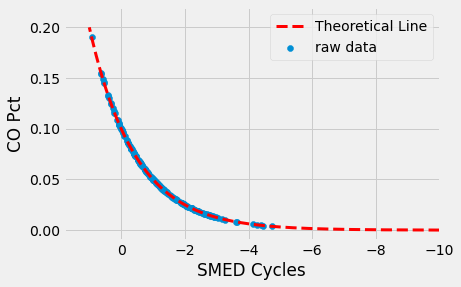

In [76]:
plt.scatter(df2.Cycles, df2.COpct, label = 'raw data')
plt.plot(np.linspace(-10,1, 1000000), smed(np.linspace(-10,1,1000000)), c='red', lw=3, ls='--', label='Theoretical Line')
plt.axis([1.8,-10,-0.01, 0.22])
plt.xlabel('SMED Cycles')
plt.ylabel('CO Pct')
plt.legend()
plt.show()

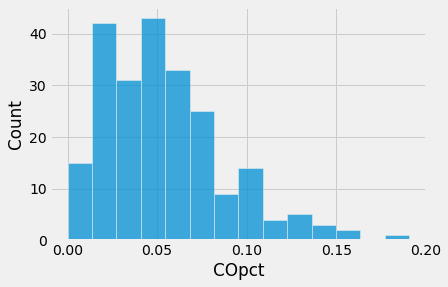

In [77]:
sns.histplot(df2.COpct)
plt.show()

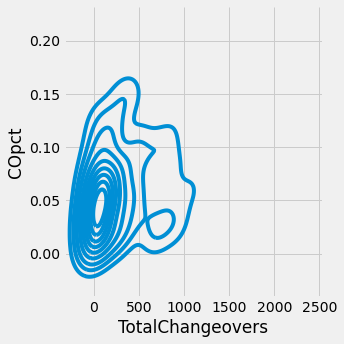

In [116]:
sns.displot(data=df2, x='TotalChangeovers', y='COpct', kind='kde')
plt.show()

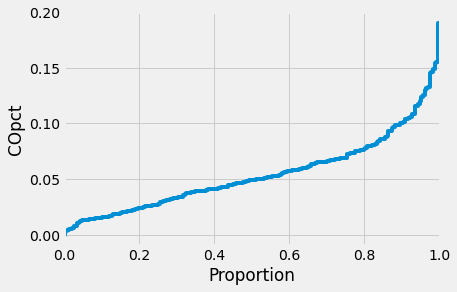

In [122]:
sns.ecdfplot(data=df2, y='COpct')
plt.show()

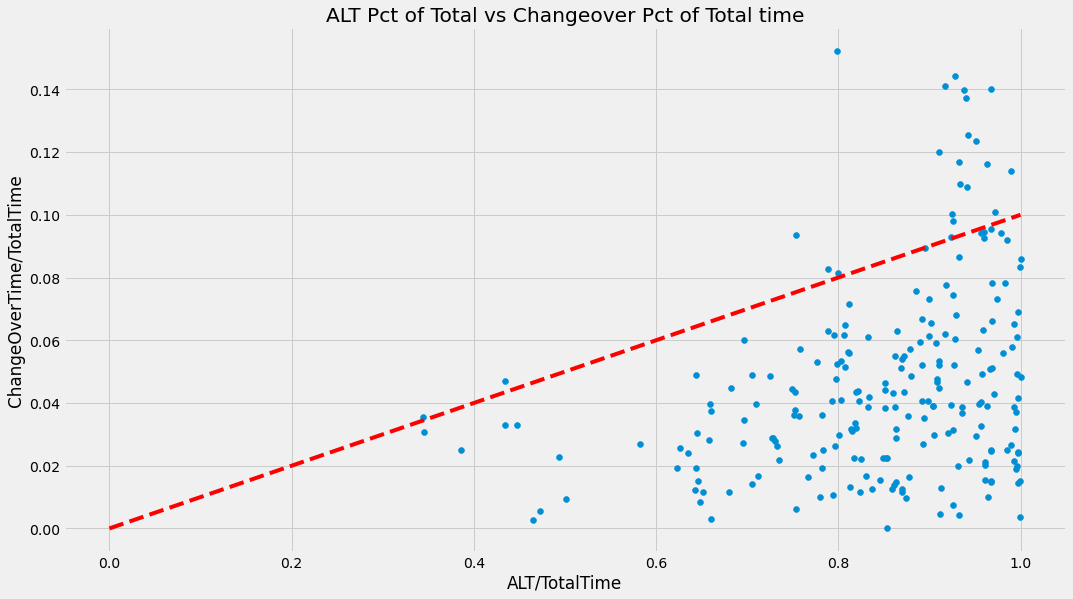

In [120]:
plt.figure(figsize=(16,9))
plt.scatter(df2.ALToverTotal,df2.COoverTotal)
plt.plot([0,1],[0,0.1], color='red', ls='--')
plt.title('ALT Pct of Total vs Changeover Pct of Total time')
plt.ylabel('ChangeOverTime/TotalTime')
plt.xlabel('ALT/TotalTime')
plt.show()


In [121]:
df2[['Line','TotalChangeovers']]

,Line,TotalChangeovers
0,10,6.00
1,11,427.25
2,12,750.00
3,13,116.00
4,14,544.00
...,...,...
234,X6,435.38
235,X7,516.00
237,line L,106.00
238,ria 1,139.00


In [79]:
df3 = pd.merge(df2[df2.COpct < 0.1], df[['Line', 'Factory', 'SubFamily', 'Category', 'SubCategory', 'Country']], how='left', left_on='Line', right_on='Line')

In [80]:
df3

,Line,CalculatedALT,PDChangeOverTime,AvgFormatChangeTime,AvgProdChangeTime,AvgDecChangeTime,COpct,Cycles,Factory,SubFamily,Category,SubCategory,Country
0,10,743.47,61.95,13.136667,0.000000,inf,0.083325,-0.263170,Independence,SP - HFFS,Savoury,Dry Savoury,United States of America
1,11,9050.93,465.92,31.419661,12.846151,3.272825,0.051478,-0.957984,Cuernavaca - Hair Care,Hair Liquids - Sachets,Hair Care,Hair Care,Mexico
2,11,9050.93,465.92,31.419661,12.846151,3.272825,0.051478,-0.957984,Cuernavaca - Hair Care,Hair Liquids - Sachets,Hair Care,Hair Care,Mexico
3,11,9050.93,465.92,31.419661,12.846151,3.272825,0.051478,-0.957984,Cuernavaca - Hair Care,Hair Liquids - Sachets,Hair Care,Hair Care,Mexico
4,11,9050.93,465.92,31.419661,12.846151,3.272825,0.051478,-0.957984,Cuernavaca - Hair Care,Hair Liquids - Sachets,Hair Care,Hair Care,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ria 2,3081.50,172.40,0.000000,0.000000,0.000000,0.055947,-0.837873,Minto,Moulded Sticks,Ice Cream,Ice Cream,Australia
1000,ria 2,3081.50,172.40,0.000000,0.000000,0.000000,0.055947,-0.837873,Minto,Moulded Sticks,Ice Cream,Ice Cream,Australia
1001,ria 2,3081.50,172.40,0.000000,0.000000,0.000000,0.055947,-0.837873,Minto,Moulded Sticks,Ice Cream,Ice Cream,Australia
1002,ria 2,3081.50,172.40,0.000000,0.000000,0.000000,0.055947,-0.837873,Minto,Moulded Sticks,Ice Cream,Ice Cream,Australia


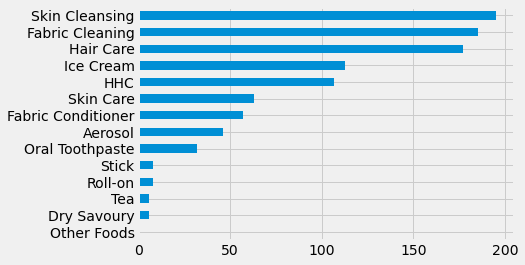

In [93]:
df3.SubCategory.value_counts(ascending=True).plot(kind='barh')
plt.show()

In [94]:
df4 = pd.merge(df2[df2.COpct >= 0.1], df[['Line', 'Factory', 'SubFamily', 'Category', 'SubCategory', 'Country']], how='left', left_on='Line', right_on='Line')

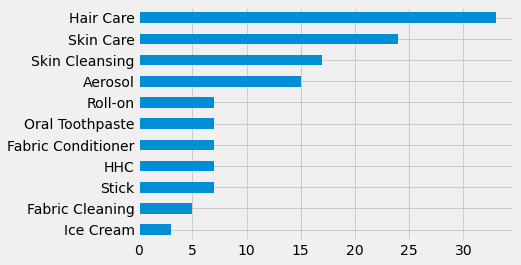

In [95]:
df4.SubCategory.value_counts(ascending=True).plot(kind='barh')
plt.show()

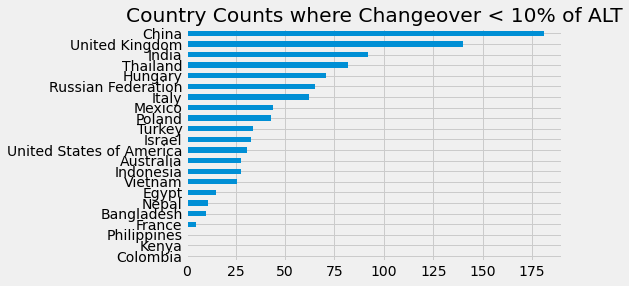

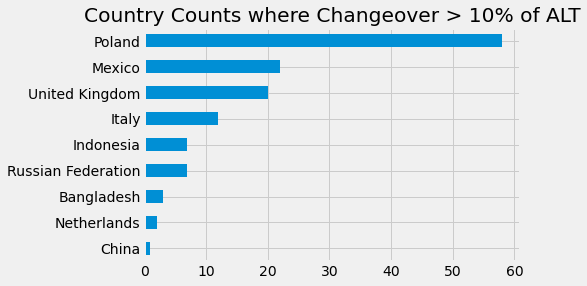

In [97]:
df3.Country.value_counts(ascending=True).plot(kind='barh')
plt.title('Country Counts where Changeover < 10% of ALT')
plt.show()
df4.Country.value_counts(ascending=True).plot(kind='barh')
plt.title('Country Counts where Changeover > 10% of ALT')
plt.show()

In [108]:
len(df[df.TotalTime == df.CalculatedALT])

14

In [126]:
df_x = pd.read_excel('../../../Downloads/df_model_extract.xlsx')

In [125]:
! pip install openpyxl

In [128]:
df_x.tail()

,datetime,Assembly_Good,Labeler_Good,Packaging_Good,Cartoner_Good,Palletizer_Good,Average_Good
87833,2021-09-30 23:55:00,464,345,480,600,600,497.8
87834,2021-09-30 23:56:00,436,498,240,200,400,354.8
87835,2021-09-30 23:57:00,443,506,480,600,200,445.8
87836,2021-09-30 23:58:00,400,459,545,400,600,480.8
87837,2021-09-30 23:59:00,400,218,0,200,400,0.0


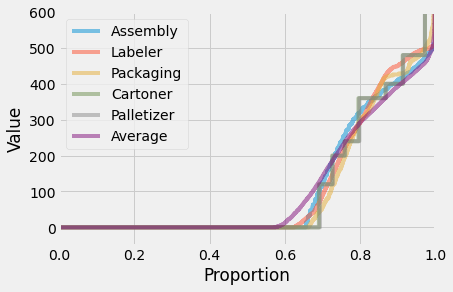

In [140]:
cols = df_x.columns[1:]

fig, ax = plt.subplots()
ax.set_ylim(bottom=-50, top=600)
ax.set_ylabel('Value')
for c in cols:
    sns.ecdfplot(data=df_x, y=c, label=c.split('_')[0], ax=ax, alpha=0.5)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Assembly_Good', ylabel='Proportion'>

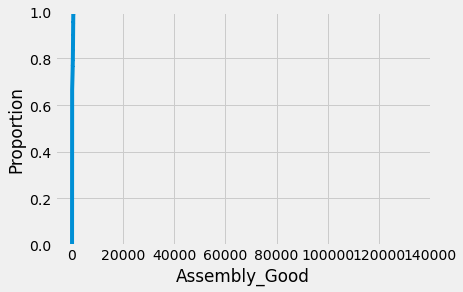

In [132]:
sns.ecdfplot(data=df_x, x = 'Assembly_Good')

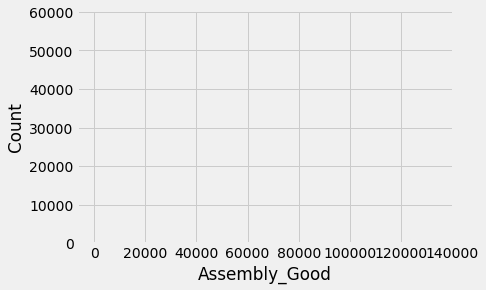

In [134]:
sns.histplot(df_x.Assembly_Good)
plt.show()

In [135]:
df_x.describe()

,Assembly_Good,Labeler_Good,Packaging_Good,Cartoner_Good,Palletizer_Good,Average_Good
count,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000
mean,110.002994,110.652679,110.416209,112.332248,111.522120,110.982477
std,484.462184,487.914411,550.500496,785.834956,783.170326,557.980352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,239.000000,200.000000,168.000000,200.000000,200.000000,222.400000
max,133586.000000,133683.000000,133450.000000,182880.000000,180960.000000,133743.800000
